<a href="https://colab.research.google.com/github/Sarasswati/playStore-data-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_directory = '/content/drive/MyDrive/Colab Notebooks/Capstone_Project_1/play_store/'
store_df = pd.read_csv(working_directory + 'Play Store Data.csv')
view_df = pd.read_csv(working_directory + 'User Reviews.csv')

In [ ]:
# Creating copy of play store data
new_df = store_df.copy()

## Before using the data it is best to clean it.

In [ ]:
# Getting unique record of categories to check if there is any unwanted value
new_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
cats = len(new_df['Category'].unique())
print('Number of categories: ', cats)

Number of categories:  34


In [ ]:
# From above view we can see that there is a category value 1.9 which might be because of some error
new_df[new_df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# Converting unwanted value to none value
new_df.loc[10472] = new_df.loc[10472].shift()
new_df['App'].loc[10472] = new_df['Category'].loc[10472]
new_df['Category'].loc[10472] = np.nan

Text(0.5, 0, 'All categories')

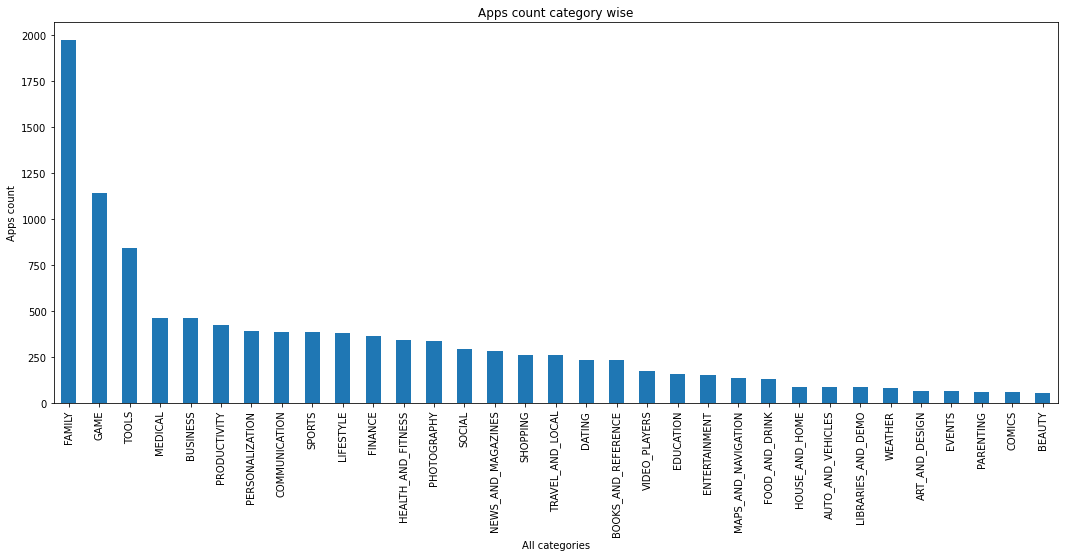

In [ ]:
# Creating chart to view the category wise comparison
plt.rcParams['figure.figsize'] = (18, 7)
all_categories = new_df.Category.value_counts()
all_categories.plot(kind='bar')
plt.title('Apps count category wise')
plt.ylabel('Apps count')
plt.xlabel('All categories')

In [ ]:
# Getting unique record of rating to check if there is any unwanted value
new_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [ ]:
new_df['Rating'] = pd.to_numeric(new_df['Rating'], errors='coerce')

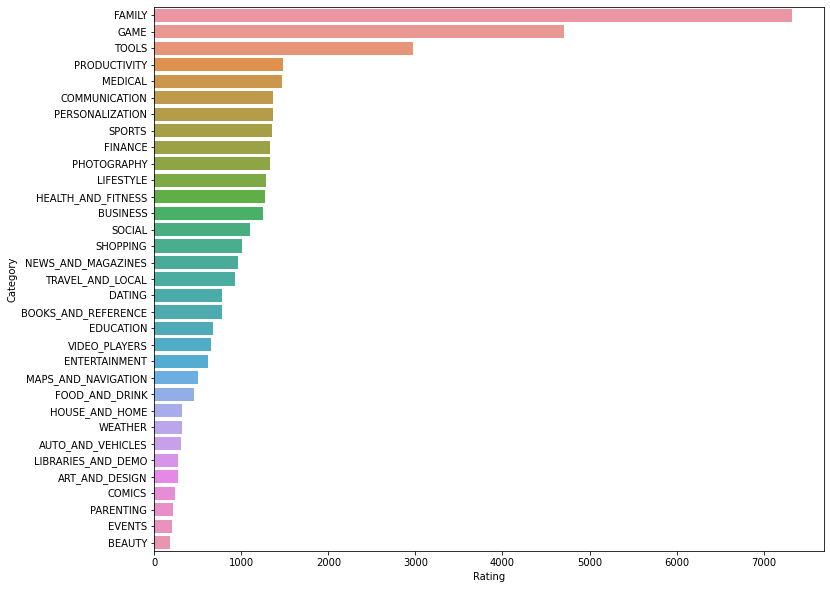

In [ ]:
plt.figure(figsize=(12,10))
sum_rew = new_df.groupby(['Category'])['Rating'].sum().sort_values(ascending=False)
sns.barplot(x=sum_rew, y=sum_rew.index, data=new_df)

In [ ]:
new_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
new_df['Reviews'] = new_df.Reviews.replace("0.0",0)
new_df['Reviews'] = new_df.Reviews.replace("3.0M",3000000.0)
new_df['Reviews'] = new_df['Reviews'].astype(float)

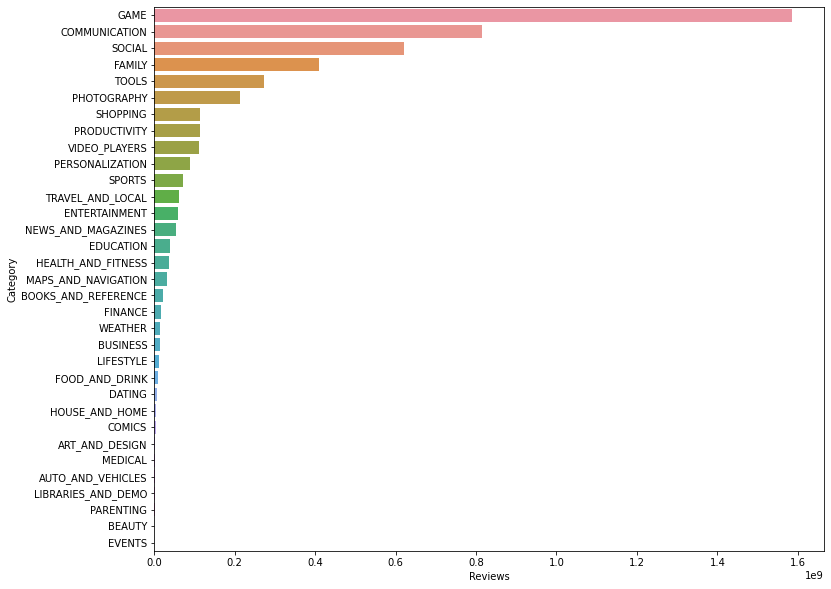

In [ ]:
# Total reviews
plt.figure(figsize=(12,10))
sum_rew = new_df.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False)
sns.barplot(x=sum_rew, y=sum_rew.index, data=new_df)

In [ ]:
new_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
new_df['Size'] = new_df.Size.replace("Varies with device",np.nan)
new_df['Size'] = new_df.Size.str.replace("M","000") # All size values became the kilobyte type.
new_df['Size'] = new_df.Size.str.replace("k","")
new_df['Size'] = new_df.Size.replace("1,000+",1000)
new_df['Size'] = new_df['Size'].astype(float)

In [ ]:
new_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
new_df['Installs'].replace(to_replace=['0', 'Free'], value=['0+','0+'],inplace=True)
Installs = []

for x in new_df.Installs:
    x = x.replace(',', '')
    Installs.append(x[:-1])

Installs = list(map(float, Installs))
new_df['Installs'] = Installs

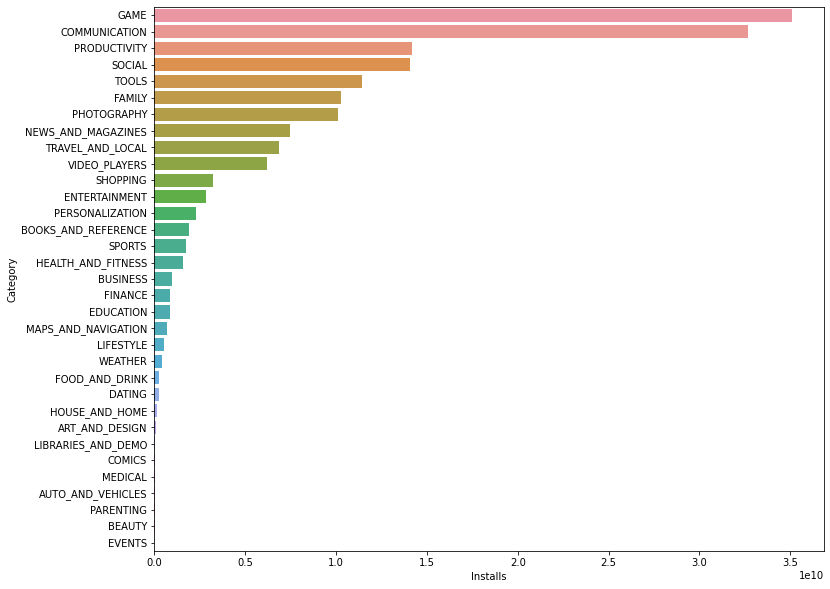

In [ ]:
# Total Installs
plt.figure(figsize=(12,10))
sum_inst = new_df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
sns.barplot(x=sum_inst, y=sum_inst.index, data=new_df)

In [ ]:
new_df['Installs'] = new_df.Installs.replace(",","")
new_df['Installs'] = new_df.Installs.replace("+","")
new_df['Installs'] = new_df.Installs.replace("Free",np.nan)
new_df['Installs'] = new_df['Installs'].astype(float)

In [ ]:
new_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
new_df['Price'] = new_df.Price.replace("Everyone",np.nan)
new_df['Price'] = new_df.Price.str.replace("$","").astype(float)

In [ ]:
# Android Version
new_df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
new_df['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
new_df['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
new_df['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
new_df['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
new_df['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
new_df['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
new_df['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
new_df['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
new_df['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
new_df['Android Ver'].fillna('1.0', inplace=True)

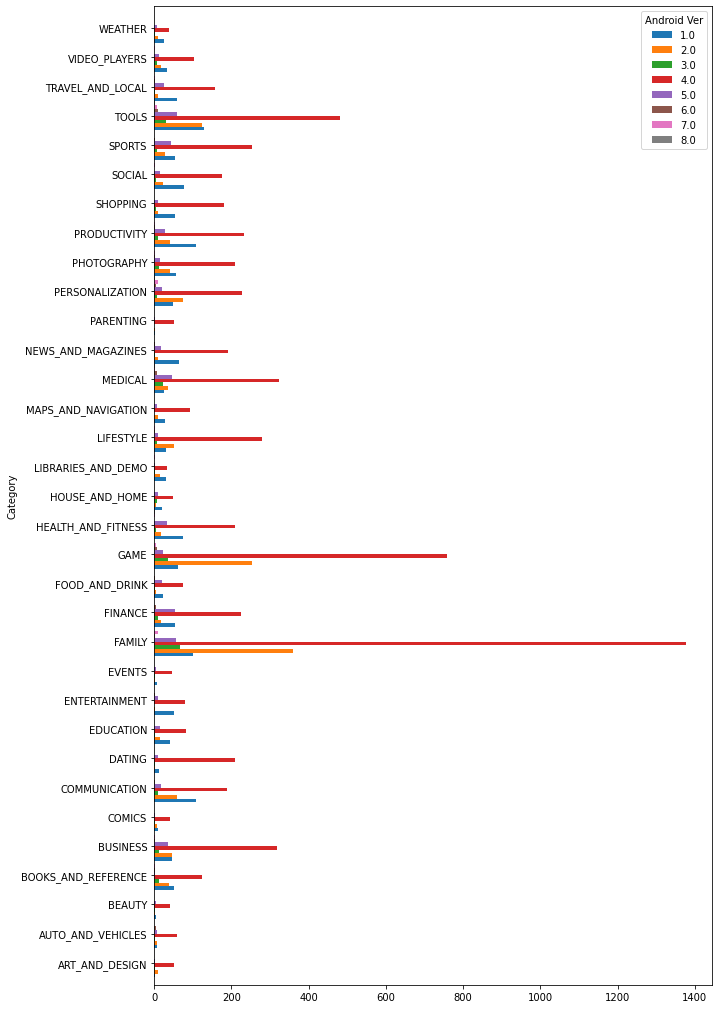

In [ ]:
Type_cat = new_df.groupby('Category')['Android Ver'].value_counts().unstack().plot.barh(figsize=(10,18), width=1)
plt.show()

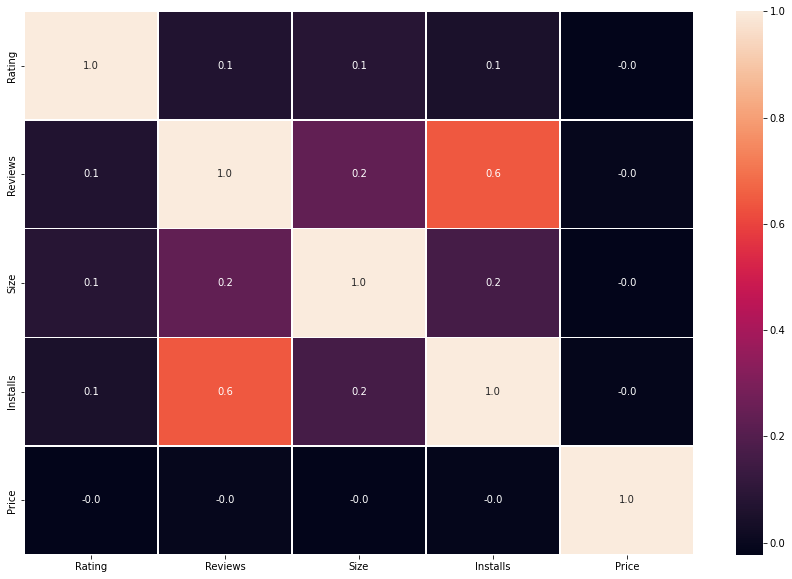

In [ ]:
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(new_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

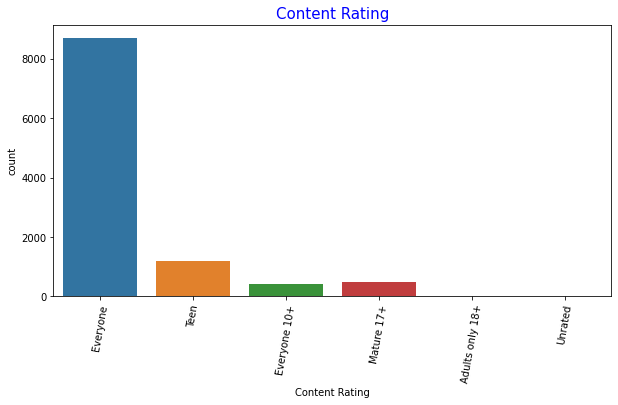

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=new_df, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()

In [ ]:
new_df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

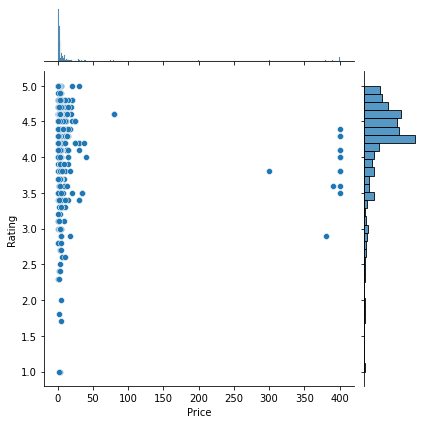

In [ ]:
new_df['Type'].replace(to_replace=['0'], value=['Free'],inplace=True)
new_df['Type'].fillna('Free', inplace=True)

paid_app_df = new_df[new_df['Type'] == 'Paid']
free_app_df = new_df[new_df['Type'] == 'Free']

plt2 = sns.jointplot(x = paid_app_df['Price'], y = paid_app_df['Rating'])

In [ ]:
# Merging App data and Review Data
merged_df = pd.merge(new_df, view_df, on = 'App', how = "inner")
# Dropping Null values
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

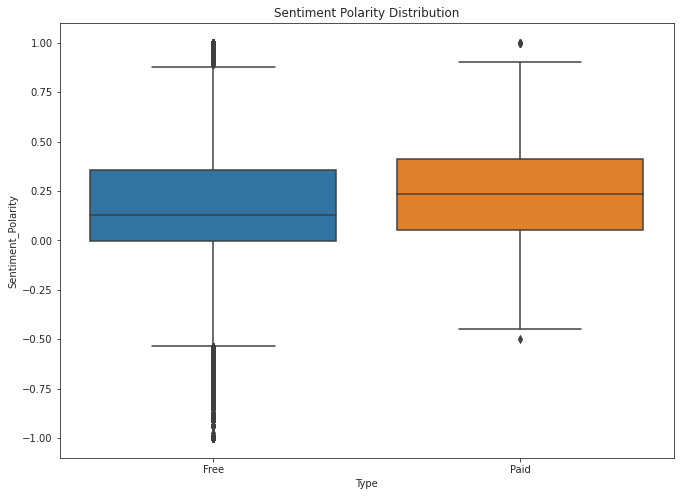

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')